In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from pandas.plotting import scatter_matrix

# Reading data

In [263]:
#uploading your CSV file from the path in the device
data = pd.read_csv('../data/sierraleone-bumbuna.csv')

# Simple EDA workflow combining all the steps

In [7]:
data.head() # checking wholeover data roughly

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-10-30 00:01,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.1,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
1,2021-10-30 00:02,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.2,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
2,2021-10-30 00:03,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.2,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
3,2021-10-30 00:04,-0.7,0.0,-0.8,0.0,0.0,21.9,99.3,0.0,0.0,0.0,0.0,0.0,1002,0,0.1,22.3,22.6,NaN
4,2021-10-30 00:05,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.3,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN


In [9]:
data.shape

(525600, 19)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525600 entries, 0 to 525599
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Timestamp      525600 non-null  object 
 1   GHI            525600 non-null  float64
 2   DNI            525600 non-null  float64
 3   DHI            525600 non-null  float64
 4   ModA           525600 non-null  float64
 5   ModB           525600 non-null  float64
 6   Tamb           525600 non-null  float64
 7   RH             525600 non-null  float64
 8   WS             525600 non-null  float64
 9   WSgust         525600 non-null  float64
 10  WSstdev        525600 non-null  float64
 11  WD             525600 non-null  float64
 12  WDstdev        525600 non-null  float64
 13  BP             525600 non-null  int64  
 14  Cleaning       525600 non-null  int64  
 15  Precipitation  525600 non-null  float64
 16  TModA          525600 non-null  float64
 17  TModB          525600 non-nul

In [13]:
data.describe()

,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
count,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,0.0
mean,201.957515,116.376337,113.720571,206.643095,198.114691,26.319394,79.448857,1.146113,1.691606,0.363823,133.044668,7.172220,999.876469,0.000967,0.004806,32.504263,32.593091,NaN
std,298.495150,218.652659,158.946032,300.896893,288.889073,4.398605,20.520775,1.239248,1.617053,0.295000,114.284792,7.535093,2.104419,0.031074,0.047556,12.434899,12.009161,NaN
min,-19.500000,-7.800000,-17.900000,0.000000,0.000000,12.300000,9.900000,0.000000,0.000000,0.000000,0.000000,0.000000,993.000000,0.000000,0.000000,10.700000,11.100000,NaN
25%,-2.800000,-0.300000,-3.800000,0.000000,0.000000,23.100000,68.700000,0.000000,0.000000,0.000000,0.000000,0.000000,999.000000,0.000000,0.000000,23.500000,23.800000,NaN
50%,0.300000,-0.100000,-0.100000,3.600000,3.400000,25.300000,85.400000,0.800000,1.600000,0.400000,161.500000,6.200000,1000.000000,0.000000,0.000000,26.600000,26.900000,NaN
75%,362.400000,107.000000,224.700000,359.500000,345.400000,29.400000,96.700000,2.000000,2.600000,0.600000,234.100000,12.000000,1001.000000,0.000000,0.000000,40.900000,41.300000,NaN
max,1499.000000,946.000000,892.000000,1507.000000,1473.000000,39.900000,100.000000,19.200000,23.900000,4.100000,360.000000,98.400000,1006.000000,1.000000,2.400000,72.800000,70.400000,NaN


In [15]:
data.isnull().sum()

Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64

In [17]:
data.dtypes

Timestamp         object
GHI              float64
DNI              float64
DHI              float64
ModA             float64
ModB             float64
Tamb             float64
RH               float64
WS               float64
WSgust           float64
WSstdev          float64
WD               float64
WDstdev          float64
BP                 int64
Cleaning           int64
Precipitation    float64
TModA            float64
TModB            float64
Comments         float64
dtype: object

# summmary statistics

In [20]:
#Summary statistics are numerical values that summarize and provide an overview of a dataset's main characteristics.

In [22]:
numerical_data = data.select_dtypes(include=['int64', 'float64'])

In [24]:
numerical_data

,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.1,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
1,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.2,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
2,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.2,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
3,-0.7,0.0,-0.8,0.0,0.0,21.9,99.3,0.0,0.0,0.0,0.0,0.0,1002,0,0.1,22.3,22.6,NaN
4,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.3,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
525595,-1.6,-0.1,-2.9,0.0,0.0,24.0,100.0,0.0,0.0,0.0,0.0,0.0,999,0,0.0,24.2,24.5,NaN
525596,-1.7,-0.1,-3.0,0.0,0.0,24.0,100.0,0.0,0.0,0.0,0.0,0.0,999,0,0.0,24.2,24.5,NaN
525597,-1.7,-0.1,-3.1,0.0,0.0,24.0,100.0,0.0,0.0,0.0,0.0,0.0,1000,0,0.0,24.1,24.4,NaN
525598,-1.7,-0.2,-3.3,0.0,0.0,23.9,100.0,0.0,0.0,0.0,0.0,0.0,1000,0,0.0,24.1,24.4,NaN


In [26]:
numerical_data.describe()

,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
count,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,0.0
mean,201.957515,116.376337,113.720571,206.643095,198.114691,26.319394,79.448857,1.146113,1.691606,0.363823,133.044668,7.172220,999.876469,0.000967,0.004806,32.504263,32.593091,NaN
std,298.495150,218.652659,158.946032,300.896893,288.889073,4.398605,20.520775,1.239248,1.617053,0.295000,114.284792,7.535093,2.104419,0.031074,0.047556,12.434899,12.009161,NaN
min,-19.500000,-7.800000,-17.900000,0.000000,0.000000,12.300000,9.900000,0.000000,0.000000,0.000000,0.000000,0.000000,993.000000,0.000000,0.000000,10.700000,11.100000,NaN
25%,-2.800000,-0.300000,-3.800000,0.000000,0.000000,23.100000,68.700000,0.000000,0.000000,0.000000,0.000000,0.000000,999.000000,0.000000,0.000000,23.500000,23.800000,NaN
50%,0.300000,-0.100000,-0.100000,3.600000,3.400000,25.300000,85.400000,0.800000,1.600000,0.400000,161.500000,6.200000,1000.000000,0.000000,0.000000,26.600000,26.900000,NaN
75%,362.400000,107.000000,224.700000,359.500000,345.400000,29.400000,96.700000,2.000000,2.600000,0.600000,234.100000,12.000000,1001.000000,0.000000,0.000000,40.900000,41.300000,NaN
max,1499.000000,946.000000,892.000000,1507.000000,1473.000000,39.900000,100.000000,19.200000,23.900000,4.100000,360.000000,98.400000,1006.000000,1.000000,2.400000,72.800000,70.400000,NaN


In [28]:
mean_values = numerical_data.mean()
mean_values

GHI              201.957515
DNI              116.376337
DHI              113.720571
ModA             206.643095
ModB             198.114691
Tamb              26.319394
RH                79.448857
WS                 1.146113
WSgust             1.691606
WSstdev            0.363823
WD               133.044668
WDstdev            7.172220
BP               999.876469
Cleaning           0.000967
Precipitation      0.004806
TModA             32.504263
TModB             32.593091
Comments                NaN
dtype: float64

In [30]:
median_values = numerical_data.median()
median_values

GHI                 0.3
DNI                -0.1
DHI                -0.1
ModA                3.6
ModB                3.4
Tamb               25.3
RH                 85.4
WS                  0.8
WSgust              1.6
WSstdev             0.4
WD                161.5
WDstdev             6.2
BP               1000.0
Cleaning            0.0
Precipitation       0.0
TModA              26.6
TModB              26.9
Comments            NaN
dtype: float64

In [32]:
std_values = numerical_data.std()
std_values

GHI              298.495150
DNI              218.652659
DHI              158.946032
ModA             300.896893
ModB             288.889073
Tamb               4.398605
RH                20.520775
WS                 1.239248
WSgust             1.617053
WSstdev            0.295000
WD               114.284792
WDstdev            7.535093
BP                 2.104419
Cleaning           0.031074
Precipitation      0.047556
TModA             12.434899
TModB             12.009161
Comments                NaN
dtype: float64

In [34]:
var_values = numerical_data.var()
var_values

GHI              89099.354830
DNI              47808.985109
DHI              25263.841076
ModA             90538.939989
ModB             83456.896317
Tamb                19.347726
RH                 421.102189
WS                   1.535737
WSgust               2.614862
WSstdev              0.087025
WD               13061.013640
WDstdev             56.777629
BP                   4.428580
Cleaning             0.000966
Precipitation        0.002262
TModA              154.626703
TModB              144.219955
Comments                  NaN
dtype: float64

In [36]:
min_values = numerical_data.min()
min_values

GHI              -19.5
DNI               -7.8
DHI              -17.9
ModA               0.0
ModB               0.0
Tamb              12.3
RH                 9.9
WS                 0.0
WSgust             0.0
WSstdev            0.0
WD                 0.0
WDstdev            0.0
BP               993.0
Cleaning           0.0
Precipitation      0.0
TModA             10.7
TModB             11.1
Comments           NaN
dtype: float64

In [38]:
max_values = numerical_data.max()
max_values

GHI              1499.0
DNI               946.0
DHI               892.0
ModA             1507.0
ModB             1473.0
Tamb               39.9
RH                100.0
WS                 19.2
WSgust             23.9
WSstdev             4.1
WD                360.0
WDstdev            98.4
BP               1006.0
Cleaning            1.0
Precipitation       2.4
TModA              72.8
TModB              70.4
Comments            NaN
dtype: float64

In [40]:
range_values = numerical_data.max() - numerical_data.min()
range_values

GHI              1518.5
DNI               953.8
DHI               909.9
ModA             1507.0
ModB             1473.0
Tamb               27.6
RH                 90.1
WS                 19.2
WSgust             23.9
WSstdev             4.1
WD                360.0
WDstdev            98.4
BP                 13.0
Cleaning            1.0
Precipitation       2.4
TModA              62.1
TModB              59.3
Comments            NaN
dtype: float64

In [42]:
skewness_values = numerical_data.skew()
skewness_values

GHI               1.306489
DNI               1.778423
DHI               1.135894
ModA              1.319351
ModB              1.330266
Tamb              0.442960
RH               -1.115544
WS                1.187762
WSgust            1.079324
WSstdev           0.387988
WD                0.052799
WDstdev           1.254194
BP               -0.335478
Cleaning         32.119348
Precipitation    18.429123
TModA             0.969845
TModB             0.899161
Comments               NaN
dtype: float64

In [44]:
kurtosis_values = numerical_data.kurt()
kurtosis_values

GHI                 0.495377
DNI                 1.852020
DHI                 0.212132
ModA                0.470148
ModB                0.528235
Tamb               -0.316925
RH                  0.548357
WS                  2.464801
WSgust              2.862801
WSstdev             1.007128
WD                 -1.535615
WDstdev             3.341437
BP                 -0.045568
Cleaning         1029.656443
Precipitation     459.309282
TModA              -0.253683
TModB              -0.473115
Comments                 NaN
dtype: float64

In [46]:
summary = numerical_data.describe()
summary

,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
count,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,0.0
mean,201.957515,116.376337,113.720571,206.643095,198.114691,26.319394,79.448857,1.146113,1.691606,0.363823,133.044668,7.172220,999.876469,0.000967,0.004806,32.504263,32.593091,NaN
std,298.495150,218.652659,158.946032,300.896893,288.889073,4.398605,20.520775,1.239248,1.617053,0.295000,114.284792,7.535093,2.104419,0.031074,0.047556,12.434899,12.009161,NaN
min,-19.500000,-7.800000,-17.900000,0.000000,0.000000,12.300000,9.900000,0.000000,0.000000,0.000000,0.000000,0.000000,993.000000,0.000000,0.000000,10.700000,11.100000,NaN
25%,-2.800000,-0.300000,-3.800000,0.000000,0.000000,23.100000,68.700000,0.000000,0.000000,0.000000,0.000000,0.000000,999.000000,0.000000,0.000000,23.500000,23.800000,NaN
50%,0.300000,-0.100000,-0.100000,3.600000,3.400000,25.300000,85.400000,0.800000,1.600000,0.400000,161.500000,6.200000,1000.000000,0.000000,0.000000,26.600000,26.900000,NaN
75%,362.400000,107.000000,224.700000,359.500000,345.400000,29.400000,96.700000,2.000000,2.600000,0.600000,234.100000,12.000000,1001.000000,0.000000,0.000000,40.900000,41.300000,NaN
max,1499.000000,946.000000,892.000000,1507.000000,1473.000000,39.900000,100.000000,19.200000,23.900000,4.100000,360.000000,98.400000,1006.000000,1.000000,2.400000,72.800000,70.400000,NaN


# data quality check

In [49]:
#missing value

In [51]:
missing_values = data.isnull().sum()
missing_values

Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64

In [53]:
missing_percentage = data.isnull().mean() * 100
missing_percentage

Timestamp          0.0
GHI                0.0
DNI                0.0
DHI                0.0
ModA               0.0
ModB               0.0
Tamb               0.0
RH                 0.0
WS                 0.0
WSgust             0.0
WSstdev            0.0
WD                 0.0
WDstdev            0.0
BP                 0.0
Cleaning           0.0
Precipitation      0.0
TModA              0.0
TModB              0.0
Comments         100.0
dtype: float64

In [55]:
#removing columns with null values

In [57]:
data = data.drop(columns=['Comments'])

In [59]:
data

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB
0,2021-10-30 00:01,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.1,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6
1,2021-10-30 00:02,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.2,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6
2,2021-10-30 00:03,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.2,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6
3,2021-10-30 00:04,-0.7,0.0,-0.8,0.0,0.0,21.9,99.3,0.0,0.0,0.0,0.0,0.0,1002,0,0.1,22.3,22.6
4,2021-10-30 00:05,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.3,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
525595,2022-10-29 23:56,-1.6,-0.1,-2.9,0.0,0.0,24.0,100.0,0.0,0.0,0.0,0.0,0.0,999,0,0.0,24.2,24.5
525596,2022-10-29 23:57,-1.7,-0.1,-3.0,0.0,0.0,24.0,100.0,0.0,0.0,0.0,0.0,0.0,999,0,0.0,24.2,24.5
525597,2022-10-29 23:58,-1.7,-0.1,-3.1,0.0,0.0,24.0,100.0,0.0,0.0,0.0,0.0,0.0,1000,0,0.0,24.1,24.4
525598,2022-10-29 23:59,-1.7,-0.2,-3.3,0.0,0.0,23.9,100.0,0.0,0.0,0.0,0.0,0.0,1000,0,0.0,24.1,24.4


In [61]:
#duplicates

In [63]:
duplicate_rows = data[data.duplicated()]
duplicate_rows

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB


In [65]:
#Data Type Validation

In [67]:
data.dtypes

Timestamp         object
GHI              float64
DNI              float64
DHI              float64
ModA             float64
ModB             float64
Tamb             float64
RH               float64
WS               float64
WSgust           float64
WSstdev          float64
WD               float64
WDstdev          float64
BP                 int64
Cleaning           int64
Precipitation    float64
TModA            float64
TModB            float64
dtype: object

In [69]:
#converting object data type to the correct format.

In [71]:
data['Timestamp'].head(10) # Show the first 10 values

0    2021-10-30 00:01
1    2021-10-30 00:02
2    2021-10-30 00:03
3    2021-10-30 00:04
4    2021-10-30 00:05
5    2021-10-30 00:06
6    2021-10-30 00:07
7    2021-10-30 00:08
8    2021-10-30 00:09
9    2021-10-30 00:10
Name: Timestamp, dtype: object

In [73]:
print(data['Timestamp'].unique())  # Show unique values to spot any anomalies

['2021-10-30 00:01' '2021-10-30 00:02' '2021-10-30 00:03' ...
 '2022-10-29 23:58' '2022-10-29 23:59' '2022-10-30 00:00']


In [75]:
data['Timestamp'] = pd.to_datetime(data['Timestamp'], format='%Y-%m-%d %H:%M')

In [77]:
data.dtypes

Timestamp        datetime64[ns]
GHI                     float64
DNI                     float64
DHI                     float64
ModA                    float64
ModB                    float64
Tamb                    float64
RH                      float64
WS                      float64
WSgust                  float64
WSstdev                 float64
WD                      float64
WDstdev                 float64
BP                        int64
Cleaning                  int64
Precipitation           float64
TModA                   float64
TModB                   float64
dtype: object

In [85]:
# absolute transform
data['GHI'] = data['GHI'].abs()

In [87]:
data['DNI'] = data['DNI'].abs()

In [89]:
data['DHI'] = data['DHI'].abs()

In [91]:
data

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB
0,2021-10-30 00:01:00,0.7,0.1,0.8,0.0,0.0,21.9,99.1,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6
1,2021-10-30 00:02:00,0.7,0.1,0.8,0.0,0.0,21.9,99.2,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6
2,2021-10-30 00:03:00,0.7,0.1,0.8,0.0,0.0,21.9,99.2,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6
3,2021-10-30 00:04:00,0.7,0.0,0.8,0.0,0.0,21.9,99.3,0.0,0.0,0.0,0.0,0.0,1002,0,0.1,22.3,22.6
4,2021-10-30 00:05:00,0.7,0.1,0.8,0.0,0.0,21.9,99.3,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
525595,2022-10-29 23:56:00,1.6,0.1,2.9,0.0,0.0,24.0,100.0,0.0,0.0,0.0,0.0,0.0,999,0,0.0,24.2,24.5
525596,2022-10-29 23:57:00,1.7,0.1,3.0,0.0,0.0,24.0,100.0,0.0,0.0,0.0,0.0,0.0,999,0,0.0,24.2,24.5
525597,2022-10-29 23:58:00,1.7,0.1,3.1,0.0,0.0,24.0,100.0,0.0,0.0,0.0,0.0,0.0,1000,0,0.0,24.1,24.4
525598,2022-10-29 23:59:00,1.7,0.2,3.3,0.0,0.0,23.9,100.0,0.0,0.0,0.0,0.0,0.0,1000,0,0.0,24.1,24.4


In [93]:
# check for outliers for columns (ModA, ModB) and wind speed data (WS, WSgust) using scatter plot.

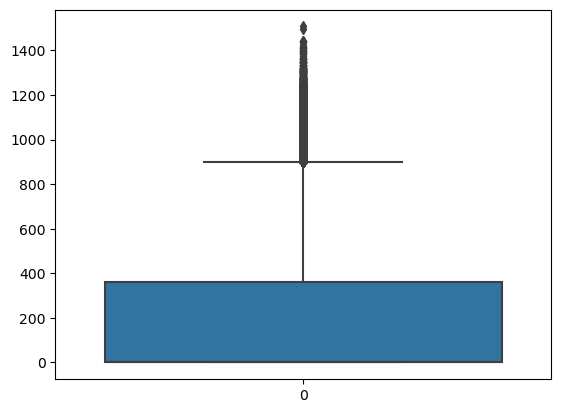

In [95]:
sns.boxplot(data['ModA'])
plt.show()

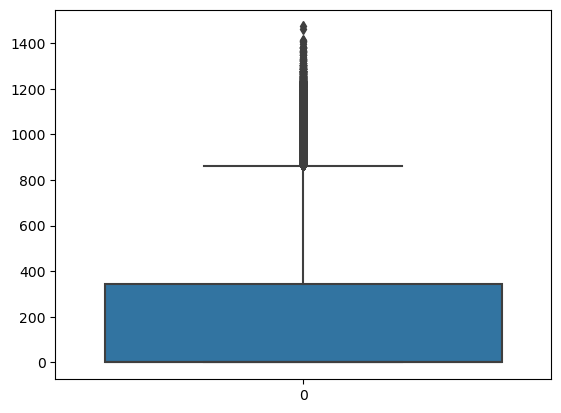

In [97]:
sns.boxplot(data['ModB'])
plt.show()

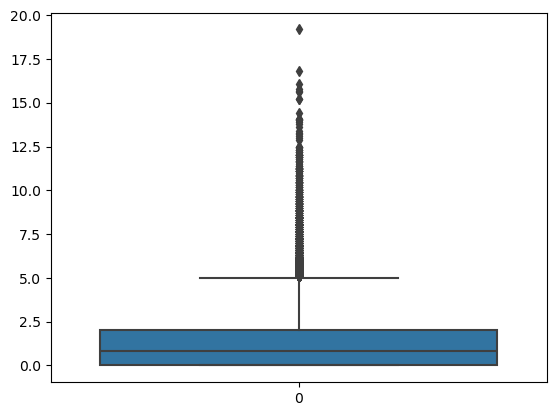

In [99]:
sns.boxplot(data['WS'])
plt.show()

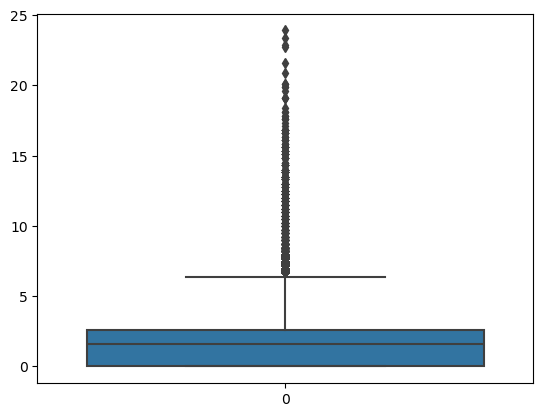

In [101]:
sns.boxplot(data['WSgust'])
plt.show()

In [103]:
#to observe different variables over time:

In [105]:
data.set_index('Timestamp', inplace=True)

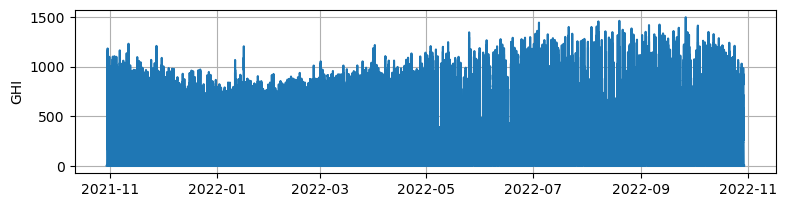

In [107]:
plt.figure(figsize=(8,8))

# Plot GHI
plt.subplot(4, 1, 1)
plt.plot(data.index, data['GHI'], label='GHI')
plt.ylabel('GHI')
plt.grid(True)
plt.tight_layout()
plt.show()

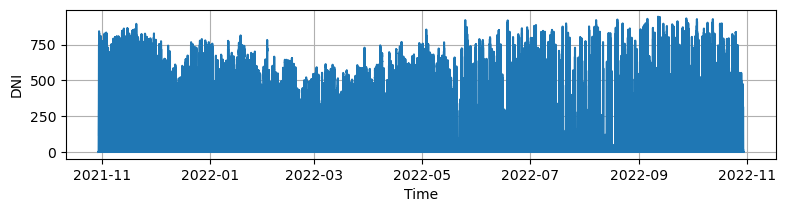

In [109]:
# Plot DNI
plt.figure(figsize=(8, 8))
plt.subplot(4, 1, 2)
plt.plot(data.index, data['DNI'], label='DNI')
plt.xlabel('Time')
plt.ylabel('DNI')
plt.grid(True)
plt.tight_layout()
plt.show()

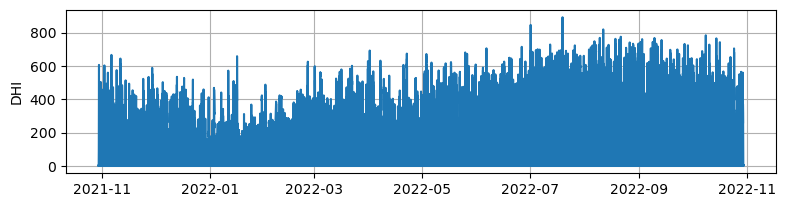

In [111]:
# Plot DHI
plt.figure(figsize=(8,8))
plt.subplot(4, 1, 3)
plt.plot(data.index, data['DHI'], label='DHI')
plt.ylabel('DHI')
plt.grid(True)
plt.tight_layout()
plt.show()

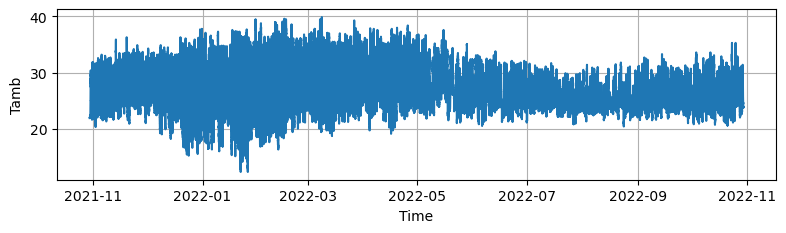

In [113]:
# Plot Tamb
plt.figure(figsize=(8,8))
plt.subplot(4, 1, 4)
plt.plot(data.index, data['Tamb'], label='Tamb')
plt.xlabel('Time')
plt.ylabel('Tamb')
plt.grid(True)
plt.tight_layout()
plt.show()

In [115]:
#Analyzing Patterns

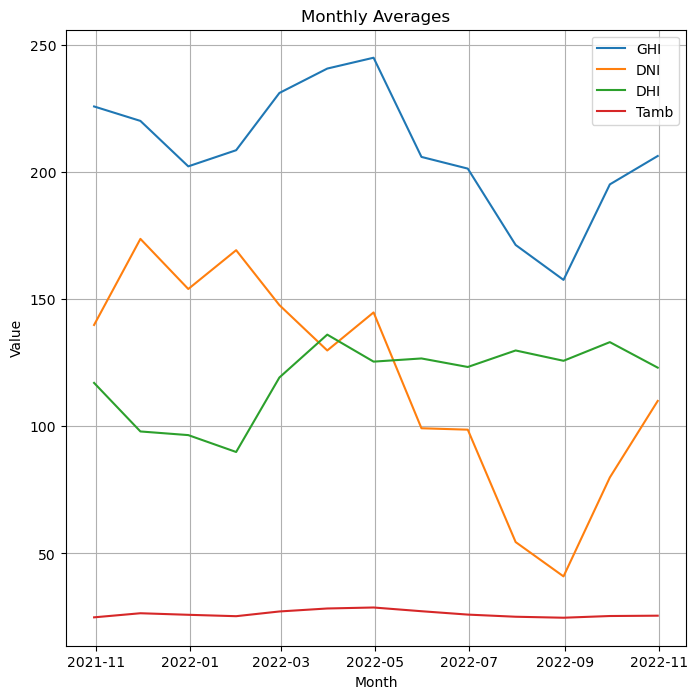

In [117]:
monthly_data = data.resample('M').mean()
plt.figure(figsize=(8, 8))
plt.plot(monthly_data.index, monthly_data['GHI'], label='GHI')
plt.plot(monthly_data.index, monthly_data['DNI'], label='DNI')
plt.plot(monthly_data.index, monthly_data['DHI'], label='DHI')
plt.plot(monthly_data.index, monthly_data['Tamb'], label='Tamb')
plt.title('Monthly Averages')
plt.xlabel('Month')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

In [119]:
#trends throughout the day but need to need to extract time components

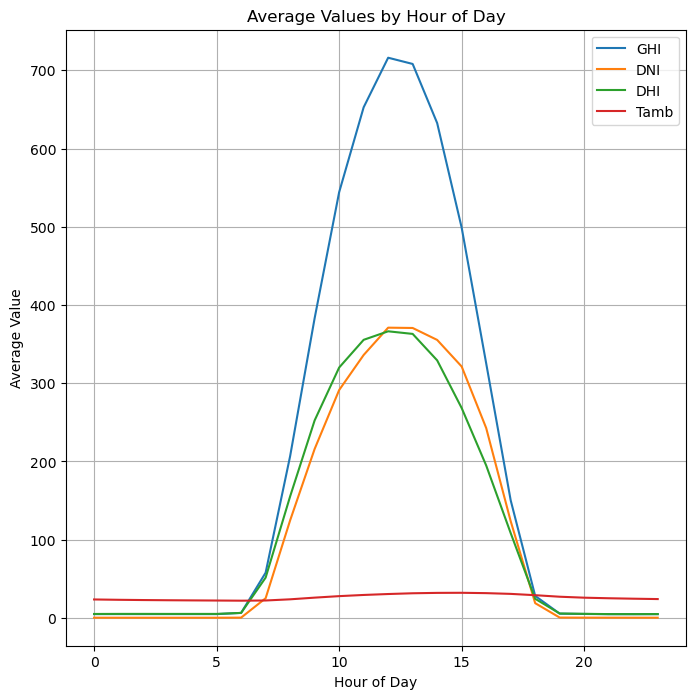

In [121]:
data['hour'] = data.index.hour
daily_data = data.groupby('hour').mean()
plt.figure(figsize=(8,8))
plt.plot(daily_data.index, daily_data['GHI'], label='GHI')
plt.plot(daily_data.index, daily_data['DNI'], label='DNI')
plt.plot(daily_data.index, daily_data['DHI'], label='DHI')
plt.plot(daily_data.index, daily_data['Tamb'], label='Tamb')
plt.title('Average Values by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Average Value')
plt.legend()
plt.grid(True)
plt.show()

In [123]:
#Anomalies look for peaks and valleys in the plots to identify anomalies.these could be times when values are unusually high or low.

In [125]:
# Identifying Peaks and Fluctuations
# Using rolling mean to smooth data
data['GHI_rolling'] = data['GHI'].rolling(window=24, center=True).mean()
data['DNI_rolling'] = data['DNI'].rolling(window=24, center=True).mean()

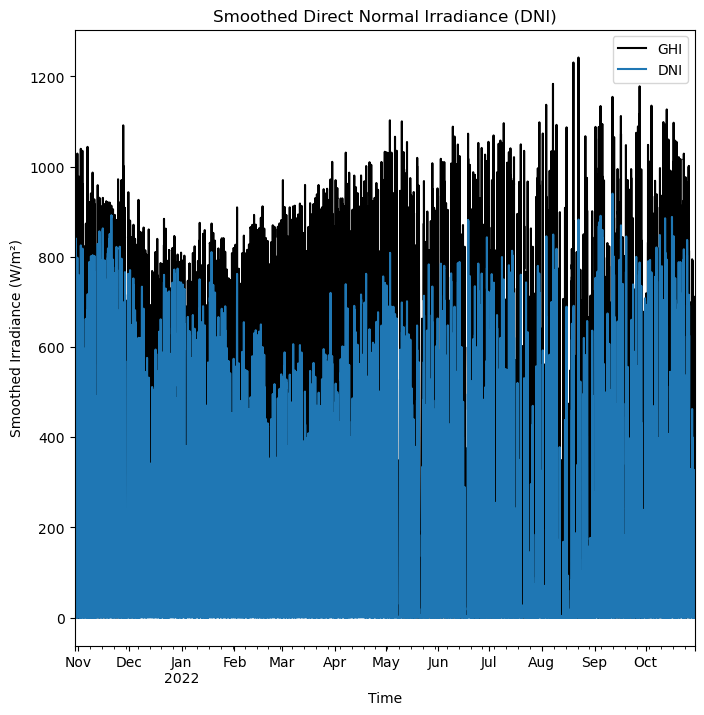

In [127]:
plt.figure(figsize=(8,8))
data['GHI_rolling'].plot(title='Smoothed Global Horizontal Irradiance (GHI)', color='black')
data['DNI_rolling'].plot(title='Smoothed Direct Normal Irradiance (DNI)')
plt.xlabel('Time')
plt.ylabel('Smoothed Irradiance (W/m²)')
plt.legend(['GHI', 'DNI'])
plt.show()

In [129]:
#Evaluate the impact of cleaning (using the 'Cleaning' column) on the sensor readings (ModA, ModB) over time.

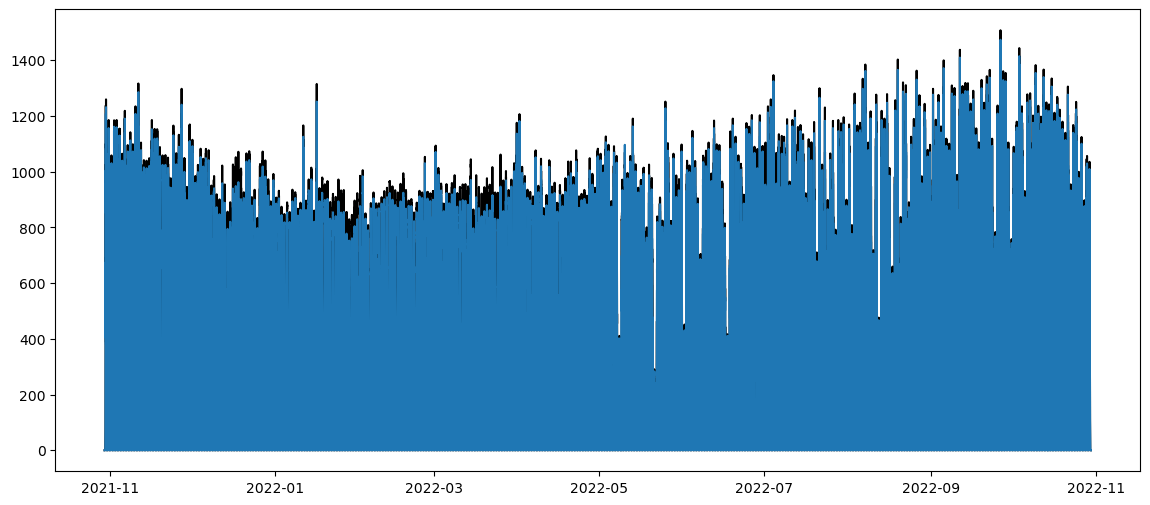

In [131]:
# Evaluating the Impact of Cleaning on Sensor Readings
# Visualizing ModA and ModB around cleaning events
cleaned_data = data[data['Cleaning'] == 1]  # Subset where cleaning occurred

plt.figure(figsize=(14, 6))
plt.plot(data.index, data['ModA'], label='ModA', color='black')
plt.plot(data.index, data['ModB'], label='ModB')

# Correlation Analysis

In [180]:
#  Heatmap for Solar Radiation and Temperature Correlations
solar_temp_columns = ['GHI', 'DNI', 'DHI', 'TModA', 'TModB']
corr_matrix_solar_temp = data[solar_temp_columns].corr()

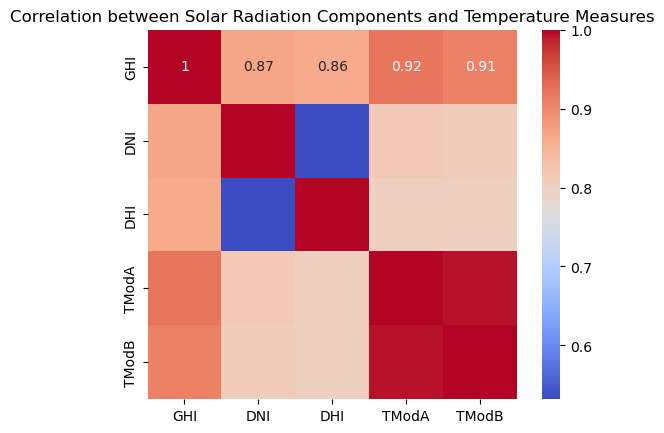

In [186]:
#Plot the heatmap
plt.figure()
sns.heatmap(corr_matrix_solar_temp, annot=True,  cmap='coolwarm', square=True)
plt.title('Correlation between Solar Radiation Components and Temperature Measures')
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

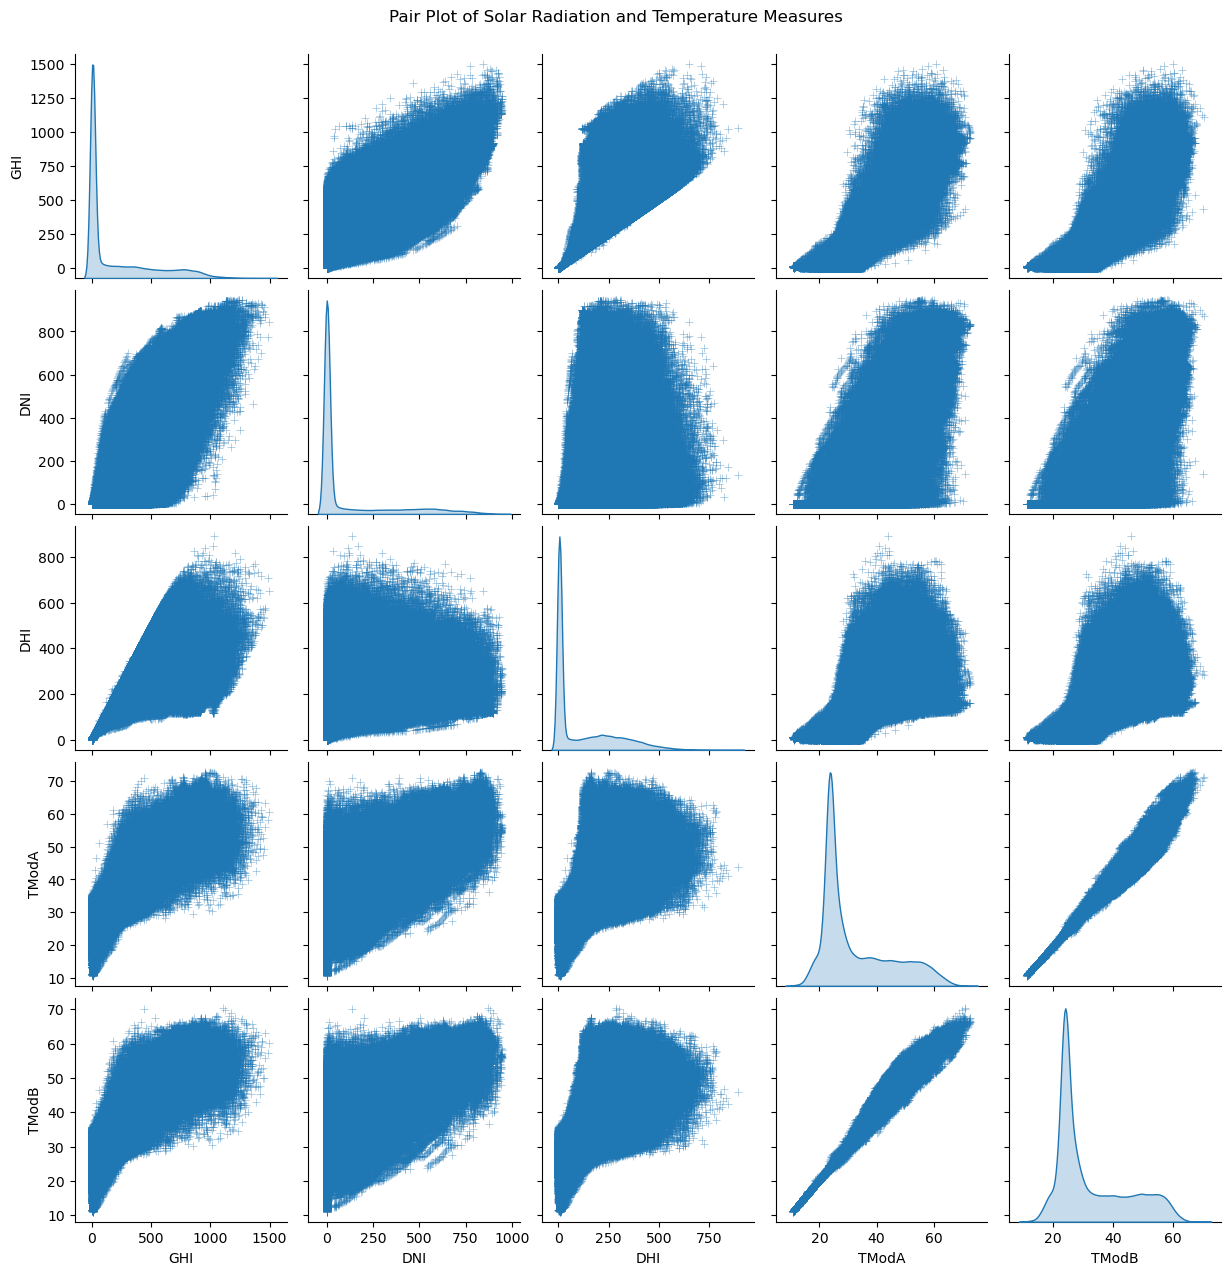

In [190]:
sns.pairplot(data[solar_temp_columns], diag_kind='kde', markers='+', plot_kws={'alpha':0.5})
plt.suptitle('Pair Plot of Solar Radiation and Temperature Measures', y=1.02)
plt.show()

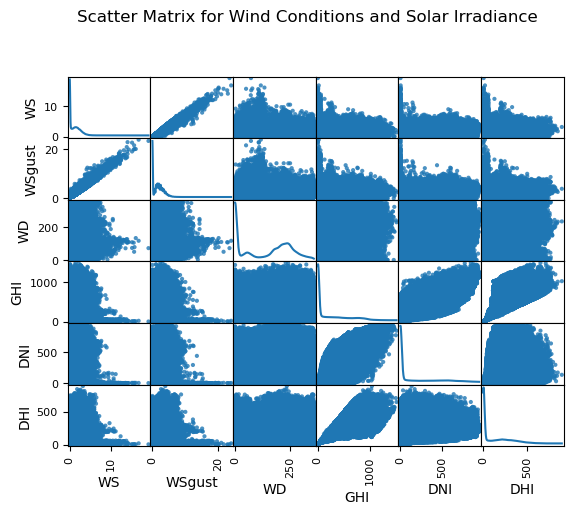

In [163]:
#scatter matrix
scatter_matrix(data[['WS', 'WSgust', 'WD', 'GHI', 'DNI', 'DHI']], alpha=0.8, diagonal='kde')
plt.suptitle('Scatter Matrix for Wind Conditions and Solar Irradiance', y=1.02)
plt.show()

# Wind Analysis

In [172]:
#Wind Speed and Direction Polar Plot

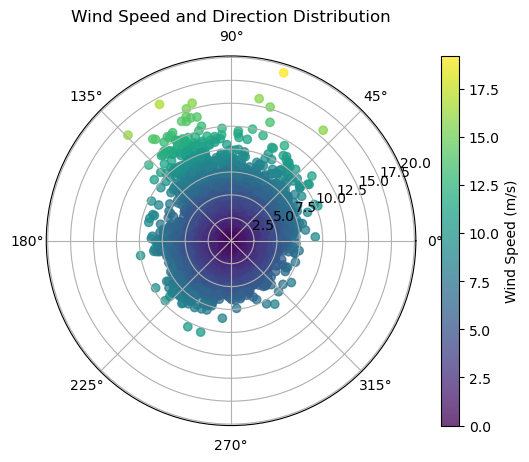

In [204]:
#Convert Wind Direction from degrees to radians
data['WD_radians'] = np.deg2rad(data['WD'])

# Polar plot for Wind Speed and Direction
plt.figure()
ax = plt.subplot(111, projection='polar')

# Scatter plot for Wind Speed and Direction
sc = ax.scatter(data['WD_radians'], data['WS'], c=data['WS'], cmap='viridis', alpha=0.75)

# Add colorbar to show Wind Speed intensity
plt.colorbar(sc, label='Wind Speed (m/s)')

# Plot title
plt.title('Wind Speed and Direction Distribution')

plt.show()

# Temperature Analysis

In [207]:
# here we use scatter plot to show the RH influence solar radiation.

Text(0, 0.5, 'GHI (W/m²)')

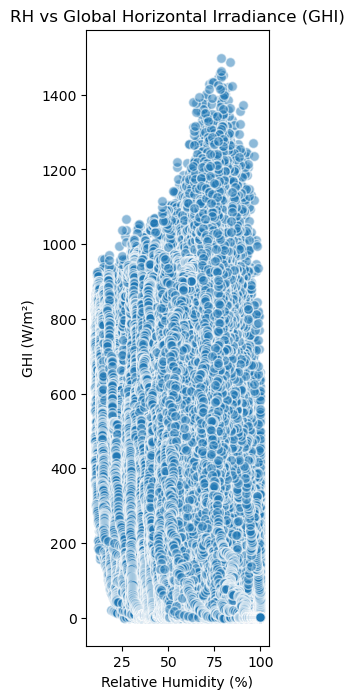

In [209]:
plt.figure(figsize=(8, 8))
# Scatter plot for RH vs Global Horizontal Irradiance (GHI)
plt.subplot(1, 3, 1)
plt.scatter(data['RH'], data['GHI'], alpha=0.5, edgecolors='w', s=50)
plt.title('RH vs Global Horizontal Irradiance (GHI)')
plt.xlabel('Relative Humidity (%)')
plt.ylabel('GHI (W/m²)')

Text(0, 0.5, 'DNI (W/m²)')

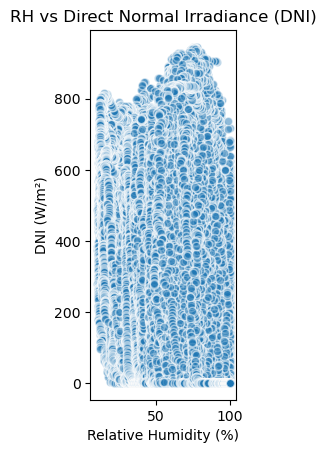

In [211]:
# Scatter plot for RH vs Direct Normal Irradiance (DNI)
plt.subplot(1, 3, 2)
plt.scatter(data['RH'], data['DNI'], alpha=0.5, edgecolors='w')
plt.title('RH vs Direct Normal Irradiance (DNI)')
plt.xlabel('Relative Humidity (%)')
plt.ylabel('DNI (W/m²)')

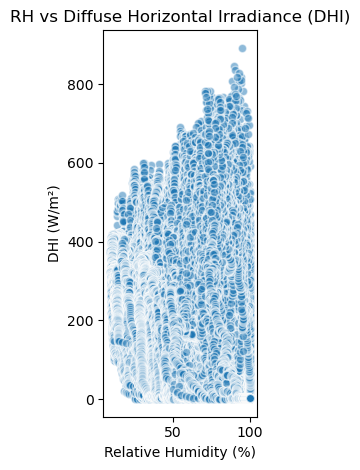

In [213]:
# Scatter plot for RH vs Diffuse Horizontal Irradiance (DHI)
plt.subplot(1, 3, 3)
plt.scatter(data['RH'], data['DHI'], alpha=0.5, edgecolors='w')
plt.title('RH vs Diffuse Horizontal Irradiance (DHI)')
plt.xlabel('Relative Humidity (%)')
plt.ylabel('DHI (W/m²)')

plt.tight_layout()
plt.show()

In [215]:
# here we use scatter plot to show the RH influence temprature reading.

Text(0, 0.5, 'Ambient Temperature (°C)')

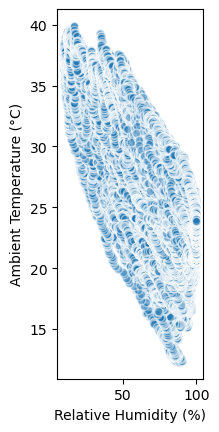

In [217]:
# Scatter plot for RH vs Ambient Temperature (Tamb)
plt.subplot(1, 3, 1)
plt.scatter(data['RH'], data['Tamb'], alpha=0.5, edgecolors='w')
plt.xlabel('Relative Humidity (%)')
plt.ylabel('Ambient Temperature (°C)')

Text(0, 0.5, 'Temperature of Module A (°C)')

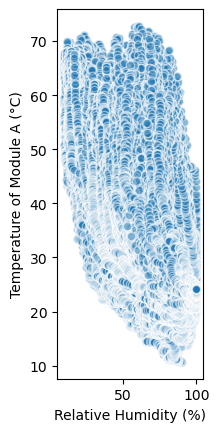

In [219]:
# Scatter plot for RH vs Temperature of Module A (TModA)
plt.subplot(1, 3, 2)
plt.scatter(data['RH'], data['TModA'], alpha=0.5, edgecolors='w')
plt.xlabel('Relative Humidity (%)')
plt.ylabel('Temperature of Module A (°C)')

Text(0, 0.5, 'Temperature of Module B (°C)')

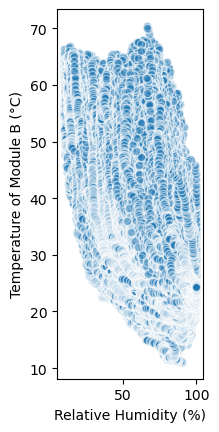

In [221]:
# Scatter plot for RH vs Temperature of Module B (TModB)
plt.subplot(1, 3, 3)
plt.scatter(data['RH'], data['TModB'], alpha=0.5, edgecolors='w')
plt.xlabel('Relative Humidity (%)')
plt.ylabel('Temperature of Module B (°C)')

# histograms

In [224]:
# histogram plot for different variable

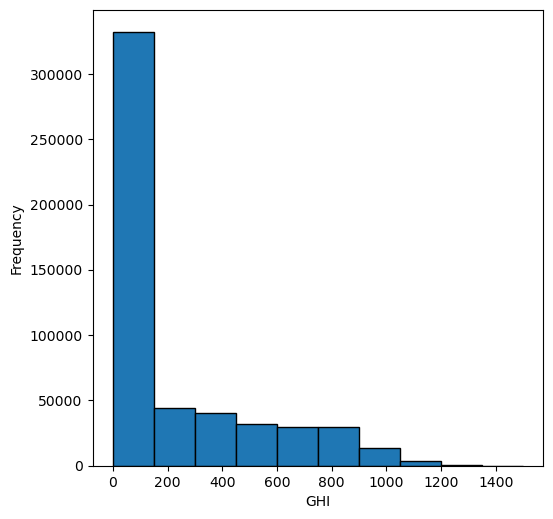

In [226]:
# Set up the plot
plt.figure(figsize=(15, 10))
plt.subplot(2, 3, 1)
plt.hist(data['GHI'], edgecolor='black')
plt.xlabel('GHI')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

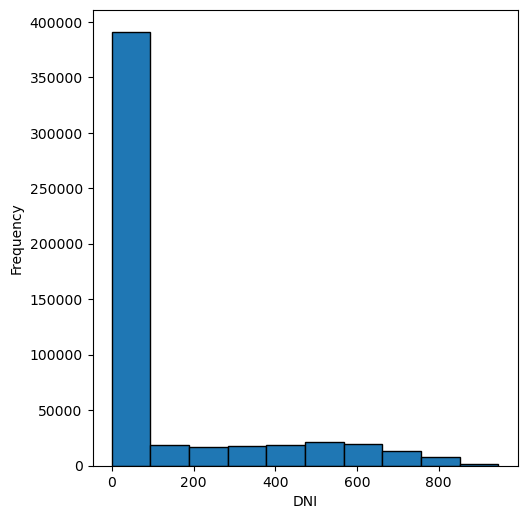

In [228]:
# Plot histogram for DNI
plt.figure(figsize=(15, 10))
plt.subplot(2, 3, 2)
plt.hist(data['DNI'], edgecolor='black')
plt.xlabel('DNI')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

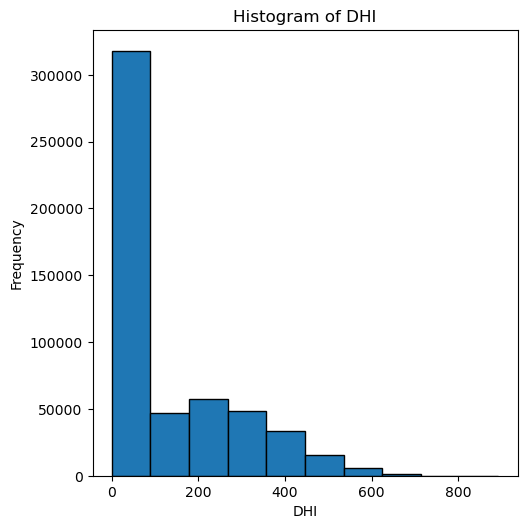

In [230]:
plt.figure(figsize=(15, 10))
plt.subplot(2, 3, 3)
plt.hist(data['DHI'], edgecolor='black')
plt.title('Histogram of DHI')
plt.xlabel('DHI')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

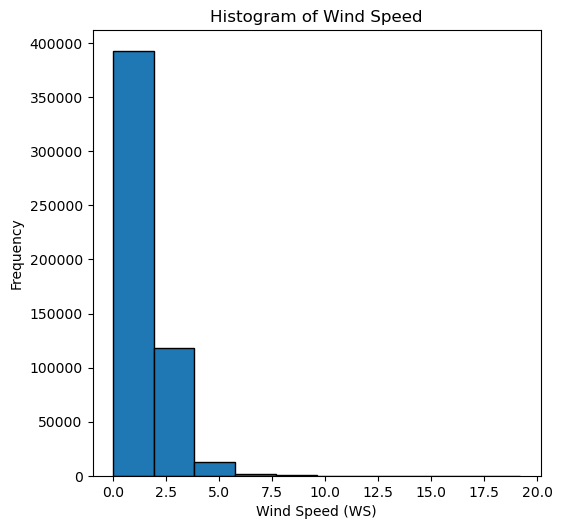

In [232]:
plt.figure(figsize=(15, 10))
plt.subplot(2, 3, 4)
plt.hist(data['WS'],edgecolor='black')
plt.title('Histogram of Wind Speed')
plt.xlabel('Wind Speed (WS)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

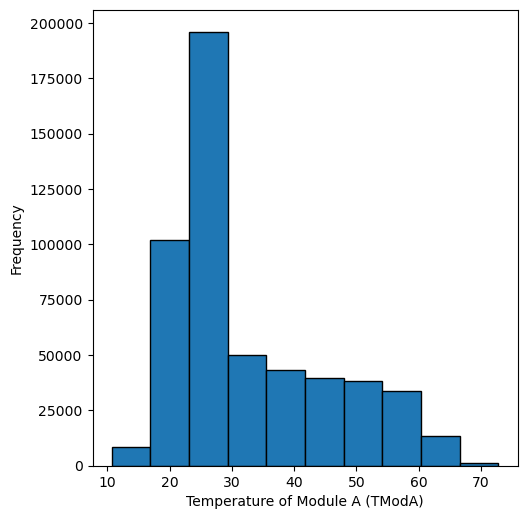

In [234]:
plt.figure(figsize=(15, 10))
plt.subplot(2, 3, 5)
plt.hist(data['TModA'], edgecolor='black')
plt.xlabel('Temperature of Module A (TModA)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

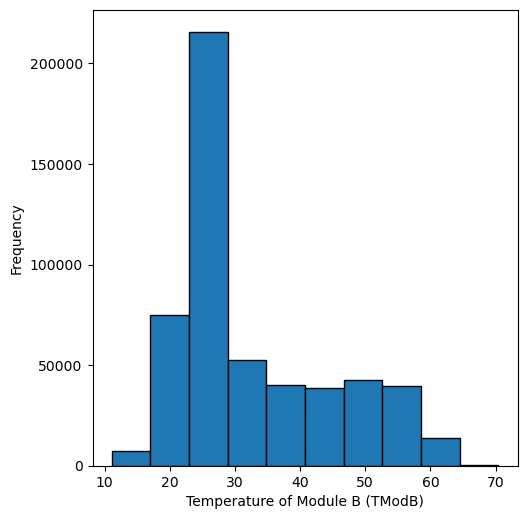

In [236]:
plt.figure(figsize=(15, 10))
plt.subplot(2, 3, 6)
plt.hist(data['TModB'], edgecolor='black')
plt.xlabel('Temperature of Module B (TModB)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# z-score analysis

In [243]:
def flag_outliers(data, column_name, threshold=3):
    mean = data[column_name].mean()
    std = data[column_name].std()
    z_scores = (data[column_name] - mean) / std
    outliers = z_scores.abs() > threshold
    return outliers

In [245]:
numeric_columns = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'Tamb', 'RH', 'WS', 'WSgust', 'WSstdev', 'WD', 'WDstdev', 'BP', 'Cleaning', 'Precipitation', 'TModA', 'TModB']

outliers_dict = {}
for column in numeric_columns:
    outliers_dict[column] = flag_outliers(data, column)

# Convert the dictionary to a DataFrame for easier viewing
outliers_data = pd.DataFrame(outliers_dict)


In [247]:
outliers_data.head()

,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB
Timestamp,,,,,,,,,,,,,,,,,
2021-10-30 00:01:00,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2021-10-30 00:02:00,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2021-10-30 00:03:00,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2021-10-30 00:04:00,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2021-10-30 00:05:00,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


# Bubble charts

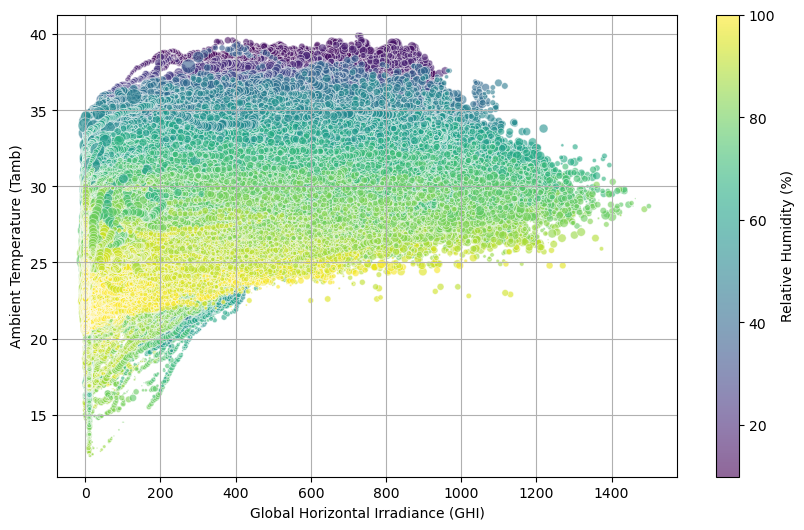

In [250]:
x = data['GHI']
y = data['Tamb']
bubble_size = data['WS'] * 10  # Scaling WS for better visualization
color = data['RH']  # Color represents relative humidity

plt.figure(figsize=(10, 6))
bubble = plt.scatter(x, y, s=bubble_size, c=color, cmap='viridis', alpha=0.6, edgecolors="w", linewidth=0.5)

plt.colorbar(bubble, label='Relative Humidity (%)')
plt.xlabel('Global Horizontal Irradiance (GHI)')
plt.ylabel('Ambient Temperature (Tamb)')

plt.grid(True)

plt.show()

# data cleaning

In [253]:
#Drop Entirely Null Columns  
#i have done that on the start of the EDA all analysis sre done excluding that column which is the "comment".

In [255]:
# handle missing value
#also done in the beginning and there is non in all columns.

In [257]:
# handle anomalies

In [259]:
data = data[(data['GHI'] >= 0) & (data['GHI'] <= 1)]

In [265]:
# Consistency checks
# Ensure Timestamps are in the correct format and continuous
data['Timestamp'] = pd.to_datetime(data['Timestamp'])
data.sort_values('Timestamp', inplace=True)